In [ ]:
import pandas as pd
df_treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv')
df_treino.shape

(100, 5)

In [ ]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv')
df_teste.shape

(8, 5)

In [ ]:
df_treino.head(10)

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.400
1,0,2,7,9,2.600
2,0,1,7,9,5.800
3,0,1,7,9,4.700
4,0,1,7,9,3.900
5,0,1,8,9,3.250
6,0,1,8,8,7.200
7,1,2,4,3,1.250
8,1,1,3,3,1.325
9,1,2,4,3,1.480


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_treino = df_treino.drop('Inadimplente', axis=1)
y_treino = df_treino['Inadimplente']

X_teste = df_teste.drop('Inadimplente', axis=1)
y_teste = df_teste['Inadimplente']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_treino, y_treino)
acc_treino = knn.score(X_treino, y_treino)
print(f'Acuracia Treino: {acc_treino * 100}')

Acuracia Treino: 100.0


In [ ]:
prev_teste = knn.predict(X_teste)
prev_teste

array([1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

acc_teste = accuracy_score(y_teste, prev_teste)
print(f'Acuracia Teste: {acc_teste * 100}')

Acuracia Teste: 100.0


[[6 0]
 [0 2]]


<Axes: >

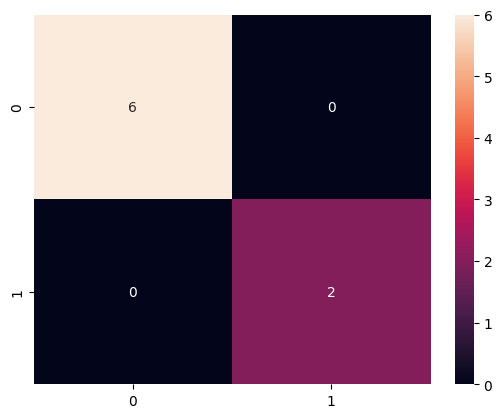

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste, prev_teste)
print(cm)
sns.heatmap(cm, fmt="d", annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, prev_teste))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### Conclusão da Matriz de Confusão e Relatório de Classificação

A matriz de confusão apresentada mostra os seguintes resultados:

- **Classe 0**:
  - Previsões corretas: 6 (True Positives)
  - Erros: 0 (False Negative)
  
- **Classe 1**:
  - Previsões corretas: 2 (True Negative)
  - Erros: 0 (False Positive)

Além disso, o **relatório de classificação** fornece as seguintes métricas:

- **Precisão, Recall e F1-score**: 1.00 (para ambas as classes 0 e 1)
- **Acurácia Geral**: 100%
- **Total de amostras**: 8

O modelo apresentou um desempenho perfeito no conjunto de dados de teste, com precisão, recall e F1-score iguais a **1.00**. Isso indica que todas as amostras foram corretamente classificadas.

Embora o desempenho do modelo seja ideal, é importante considerar o tamanho pequeno do conjunto de dados, que contém apenas 8 amostras. Em conjuntos de dados maiores e mais variados, o desempenho do modelo pode variar.
